In [13]:
#from google.colab import drive
import numpy as np
#from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import time
#import statistics
import pandas as pd
import sqlite3
import os.path

In [2]:
#drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#fn = "/content/gdrive/My Drive/chess_data/chessDB.db"
fn = "chessDB.db"

In [3]:
conn = sqlite3.connect(fn)
c = conn.cursor()
#c.execute("SELECT * FROM users;")
#users = c.fetchall()
#print("Number of users: ", len(users))

In [0]:
df = pd.read_sql_query("SELECT users.uid, min(user_events.date) FROM users INNER JOIN user_events ON users.uid = user_events.user_id GROUP BY users.uid;", conn)

In [6]:
df.head(20)

,uid,min(user_events.date)
0,12435050,1992-02-02
1,12435066,1991-11-24
2,12435088,2017-05-20
3,12435092,1994-11-20
4,12435105,1992-09-12
5,12435108,1999-08-18
6,12435118,1993-02-23
7,12435133,1991-11-10
8,12435144,1995-07-15
9,12435145,2008-04-26


In [0]:
year_count = df.groupby('min(user_events.date)').count()

In [0]:
year_count['cumsum'] = year_count['uid'].cumsum()

# Number of players who register every day

In [0]:
year_count.index = pd.to_datetime(year_count.index)

In [19]:
year_count[-100:]

,uid,cumsum
min(user_events.date),,
2018-03-10,1,290301
2018-03-29,1,290302
2018-03-30,1,290303
2018-03-31,1,290304
2018-04-05,1,290305
2018-04-07,1,290306
2018-04-08,1,290307
2018-04-10,1,290308
2018-04-13,1,290309


Text(0, 0.5, 'Number of chess players')

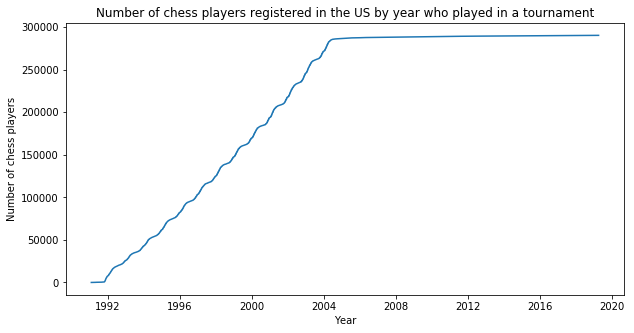

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(year_count.index, year_count['cumsum'].values)
plt.title("Number of chess players registered in the US by year who played in a tournament")
plt.xlabel("Year")
plt.ylabel("Number of chess players")

TODO: Fit 2 lines to graph

# Average rating and standard deviation by year

In [4]:
ratings_df = pd.read_sql_query("SELECT date, user_events.reg_after, users.uid FROM users INNER JOIN user_events ON users.uid = user_events.user_id;", conn)

In [5]:
ratings_df.head()

,date,reg_after,uid
0,1996-08-25,1385 (P5),12683802
1,1994-12-10,735 (P8),12632612
2,1994-11-06,711 (P4),12632612
3,2001-02-10,576 (P5),12831758
4,1993-04-15,None,12582004


In [6]:
ratings_date_df = pd.DataFrame()

Rows are dates (one date column), columns is the rating for each uid (300k uid columns)

In [8]:
dates = list(sorted(set(ratings_df['date'])))

In [11]:
len(dates)

10057

In [17]:
dates[0], dates[-2]

('1991-01-28', '2019-04-09')

In [9]:
ratings_date_df['dates'] = dates

In [10]:
ratings_date_df.head()

,dates
0,1991-01-28
1,1991-01-31
2,1991-02-18
3,1991-02-26
4,1991-03-17


In [12]:
len(ratings_df)

3283074

Let's just keep track of rating by year, and the latest rating for that year

In [52]:
uid_date_d = {}
start = time.time()
for index, row in ratings_df.iterrows():
    if index % 100000 == 0:
        print(index)
    if not row.uid in uid_date_d.keys():
        uid_date_d[row.uid] = {}
    year = row.date[:4]
    #uid_date_d[row.uid][row.date] = row.reg_after
    # get rid of provisional part
    uid_date_d[row.uid][year] = int(row.reg_after.split(" ")[0]) if row.reg_after else None
end = time.time()
print(end - start, " seconds")

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
485.11591267585754  seconds


In [27]:
len(list(uid_date_d.keys()))

290434

In [28]:
uid_date_d[12683802]

{'1996': '1385 (P5)'}

In [48]:
#uid_date_d[12683802]['1996'].split(" ")[0]
int("1385")

1385

In [47]:
"1385".split(" ")[0]

'1385'

In [29]:
uid_set = set(ratings_df['uid'])

In [30]:
uids = list(uid_set)

In [31]:
len(uids)

290434

In [33]:
# years: 1991 - 2019
years = [str(x) for x in range(1991, 2020)]
years

['1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [53]:
for num, uid in enumerate(uids):
    for index, year in enumerate(years):
        if year not in uid_date_d[uid]:
            try:
                uid_date_d[uid][year] = uid_date_d[uid][years[index - 1]]
            except:
                uid_date_d[uid][year] = "NA"
        elif uid_date_d[uid][year] == None:
            try:
                uid_date_d[uid][year] = uid_date_d[uid][years[index - 1]]
            except:
                uid_date_d[uid][year] = "NA"

In [ ]:
df = pd.DataFrame(index=years)
start = time.time()
for num, uid in enumerate(uids):
    if num % 10000 == 0:
        print(num)
    u = []
    for year in years:
        u.append(uid_date_d[uid][year])
    df[uid] = u
end = time.time()
print(end - start, "seconds")

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000


# Close Connection

In [0]:
conn.close()